# Simulacion de Montecarlo

Consiste en simular el calculo del valor exacto de el numero pi

PASOS PARA GENERAR EL VALOR EXACTO DE PI
- PASO1: Generar 2 numeros aleatorios "x" & "y" [0,1] entre el intervalo cerrado .

- PASO 2: Calcular (X*X + Y*Y)

- OBSERVACION_1: Si el valor es inferior a 1 estamos dentro del circulo.

- OBSERVACION_2: Si el valor es superior a  1 estamos fuera del circulo.

- PASO 3 : Calculamos el numero total de veces que estan dentro del cirlulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la PROBABILIDAD DE CAER DENTRO DEL CIRCULO (USAMOS DOCHA PROBABILIDAD PARA OBTENER EL VALOR DE PI).

- PASO 4: Repetimos el experimento un numero suficiente de veces para otener diferentes aproximaciones de π.

- PASO 5: Calculamos el promedio de los 1000 experimentos anteriores para  dar un valor final de π.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def pi_montecarlo(n, np_exp):
    pi_avg = 0 #El numero PI empezara por valer 0.
    pi_value_list = [] #C on este array iremos rellenanado con los diferentes resultados.
    for i in range (np_exp): # PASO 1 & 2 Con este metodo calculamos el valor diferentes veces
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):#Segundo metodo que saca el valor de x^2 + y^2
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <=1: #Si el valor es inferior a 1 estamos dentro del circulo.
                value += 1
        float_value= float(value) #Aproximacion del valor convirtiendolo de tipo entero a tipo flotante.
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value 
    
    pi = pi_avg/np_exp #Valor total de pi PASO 3

    print(pi)
    fig = plt.plot(pi_value_list)
    return(pi, fig)

3.1414743999999986


(3.1414743999999986, [<matplotlib.lines.Line2D at 0x11909aa90>])

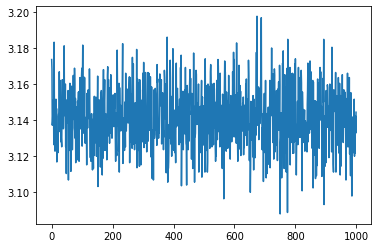

In [14]:
pi_montecarlo(10000, 1000) #Generamos n puntos y lo repetimos np_exp veces

# SEGUNDO EJEMPLO "INTEGRACIÓN CON MONTECARLO".

In [33]:
#Definimos la funcion a integrar que nos va a regresar el valor de e elvado a la menos x al cuadrado
def G(x):
    return np.exp(-x**2)
#Definimos la funcion montecarlo que recibe como parametros G,a & b y el numero d epuntos
def monte_carlo(G,a,b,M):
    s = 0
    for i in range(M):#Iteramos M veces
        s += G(a+(b-a)*np.random.uniform(0,1,1)) #Con la funcion np.random.uniform generamos "6 " valores aleatorios en el intervalo de 0 a 1
    return ((b-a)/M)*s[0]

In [34]:
a = monte_carlo(G,1,3,10000)

In [35]:
print("La integral de G es: {} ".format(a))

La integral de G es: 0.13782012715858893 


# Dummy Data Sets

In [42]:
n = 10000
#Con la funcion pd.DataFrame de la lbreria pandas creamos el dataset
data = pd.DataFrame(
    {
        
      'Normal_1' : np.random.randn(n),
      'Normal_2' : 1.5 + 2.5 * np.random.randn(n),
      'Uniforme' : np.random.uniform(5, 32, n)
    
    }
)

In [43]:
data.describe()

,Normal_1,Normal_2,Uniforme
count,10000.000000,10000.000000,10000.000000
mean,0.011181,1.515061,18.523789
std,1.001587,2.499874,7.824545
min,-4.591294,-9.355904,5.001384
25%,-0.672749,-0.147574,11.774933
50%,0.023704,1.510340,18.477272
75%,0.673888,3.197456,25.313733
max,3.845912,12.981447,31.999829


(array([1.000e+00, 1.900e+01, 1.580e+02, 9.200e+02, 2.465e+03, 3.261e+03,
        2.212e+03, 7.950e+02, 1.520e+02, 1.700e+01]),
 array([-4.59129443, -3.74757379, -2.90385315, -2.0601325 , -1.21641186,
        -0.37269122,  0.47102942,  1.31475006,  2.1584707 ,  3.00219134,
         3.84591198]),
 <a list of 10 Patch objects>)

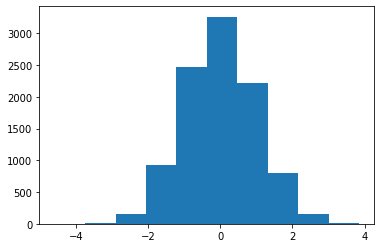

In [44]:
plt.hist(data['Normal_1'])

(array([3.000e+00, 5.800e+01, 3.970e+02, 1.699e+03, 3.343e+03, 2.956e+03,
        1.253e+03, 2.640e+02, 2.600e+01, 1.000e+00]),
 array([-9.35590445, -7.12216928, -4.88843411, -2.65469895, -0.42096378,
         1.81277139,  4.04650655,  6.28024172,  8.51397689, 10.74771206,
        12.98144722]),
 <a list of 10 Patch objects>)

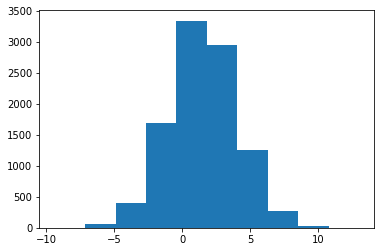

In [45]:
plt.hist(data['Normal_2'])

(array([1026.,  991.,  984.,  992., 1015.,  977.,  969., 1041.,  994.,
        1011.]),
 array([ 5.00138429,  7.70122878, 10.40107327, 13.10091776, 15.80076225,
        18.50060673, 21.20045122, 23.90029571, 26.6001402 , 29.29998469,
        31.99982917]),
 <a list of 10 Patch objects>)

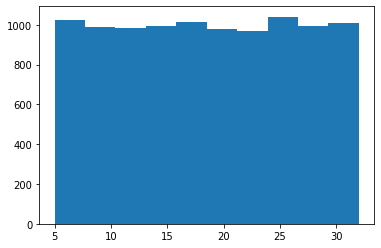

In [46]:
plt.hist(data['Uniforme'])

In [69]:
data = pd.read_csv("https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/customer-churn-model/Customer%20Churn%20Model.txt")

In [70]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [54]:
#Extraemos la lista de columnas
column_name = data.columns.values.tolist()

In [55]:
a = len(column_name)

In [67]:
#Generamos un nuevo data set donde aparece la informacion de los dummysets
new_data = pd.DataFrame(
    {
        
      'Column Name' : column_name,
      'A' : np.random.randn(a),
      'B' : np.random.uniform(0,1,a)
    
    }
)

In [68]:
new_data

,Column Name,A,B
0,State,-0.374705,0.275306
1,Account Length,-0.073667,0.878826
2,Area Code,-1.003910,0.473572
3,Phone,-0.449698,0.537449
4,Int'l Plan,0.037778,0.071954
5,VMail Plan,-1.846850,0.276206
6,VMail Message,-1.942989,0.576329
7,Day Mins,-0.462267,0.899304
8,Day Calls,-0.663510,0.133323
9,Day Charge,0.951480,0.380453
